<a href="https://colab.research.google.com/github/MarioBolanos/NumericalAnalysis/blob/master/2_LinearAlgebraReview/Cap2_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
def downloadDriveFile(file_id,file_name,file_extension):
  '''
  Allows charge of public files into colab's workspace
  '''
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$file_id -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$file_id -O "$file_name"."$file_extension" && rm -rf /tmp/cookies.txt

if 'google.colab' in str(get_ipython()):
    downloadDriveFile('1uY4ijPPkUxOO_BMwRnxuq10ucWCNkhGT','linalg_tools','py')

--2022-03-17 15:37:32--  https://docs.google.com/uc?export=download&confirm=t&id=1uY4ijPPkUxOO_BMwRnxuq10ucWCNkhGT
Resolving docs.google.com (docs.google.com)... 173.194.203.139, 173.194.203.102, 173.194.203.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r795a64u3gqvt300cou96nu42t7ik33n/1647531450000/13809482735677549503/*/1uY4ijPPkUxOO_BMwRnxuq10ucWCNkhGT?e=download [following]
--2022-03-17 15:37:33--  https://doc-0c-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r795a64u3gqvt300cou96nu42t7ik33n/1647531450000/13809482735677549503/*/1uY4ijPPkUxOO_BMwRnxuq10ucWCNkhGT?e=download
Resolving doc-0c-80-docs.googleusercontent.com (doc-0c-80-docs.googleusercontent.com)... 173.194.202.132, 2607:f8b0:400e:c00::84
Connecting to doc-0c-80-docs.googleusercontent.com (doc-

In [ ]:
def least_squares(slope, intercept):
    A = np.zeros((slope.shape[0], 2))
    A[:, 0] = 1
    A[:, 1] = -slope[:, 0]
    return np.linalg.inv(A.T@A)@A.T@intercept

#2.17 Problems

In [5]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

import linalg_tools

##Problem 2
Find the rank of the following matrices using column operation:


(a) \begin{equation} 
A= \begin{bmatrix} -1 & 2 & 0 \\ 1 & 2 & 3\\ a & b & c
\end{bmatrix}
\end{equation}

(b) \begin{equation} 
A= \begin{bmatrix} 3 & 2 & 2 & −5 \\ 0.6& 1.5 &1.5 &−5.4 \\
1.2 &−0.3 &−0.3 &2.4
\end{bmatrix}
\end{equation}

In [ ]:
# a
A = np.array([[-1, 2, 0],
[5, 1, -2],[6, 3, 4]])
rankA = np.linalg.matrix_rank(A)

# b
B = np. array([[3, 2, 2, -5],
[0.6, 1.5, 1.5, -5.4],
[1.2, -0.3, -0.3, 2.4]])
rankB = np.linalg.matrix_rank(B)

print('The rank of A is ', rankA)
print('The rank of B is ', rankB)

The rank of A is  3
The rank of B is  2


##Problem 3

Find the number of solutions for linear equations with the following augmented
matrices $\widehat A = [A b]$:

(a) \begin{equation} 
A= \begin{bmatrix} 2 &−1 &3 &0\\−1 &4 &−1 &10\\0 &10 &15 &50\\20 &10 &1 &40
\end{bmatrix}
\end{equation}
(b) \begin{equation} 
A= \begin{bmatrix} 4 &1 &0 &4\\5 &−3 &1 &2\\−9 &2 &−1 &5
⎤
\end{bmatrix}
\end{equation}

In [ ]:
def lin_sol(augmented_matrix):
    
    matrix = augmented_matrix[:, 0:-1]
    
    rank = np.linalg.matrix_rank(matrix)
    rank_augmented = np.linalg.matrix_rank(augmented_matrix)
    
    if (rank < rank_augmented):
        return 'no solution'

    unique_solution = rank == rank_augmented == matrix.shape[1]
    
    if unique_solution:
        return 'unique solution'
    
    else:
        return 'infinite solutions'


In [6]:
# a
A_augmented = np.array([[2, -1, 3, 0],
[-1, 4, -1, 10],
[0, 10, 15, 50],
[20, 10, 1, 40]])

solutions = linalg_tools.lin_sol(A_augmented)

print('About the first system...')
if solutions == 'unique solution':
    A = A_augmented[0:-1, 0:-1]
    b = A_augmented[0:-1, -1]
    X = np.linalg.solve(A, b)
    print('The solutions are ', X)
else:
    print('The system has ' + solutions + '\n')

# b
A_augmented = np.array([[2, -1, 3, 0],
[-1, 4, -1, 10],
[0, 10, 15, 50],
[20, 10, 1, 40]])

solutions = linalg_tools.lin_sol(A_augmented)

print('About the second system...')

if solutions == 'unique solution':
    A = A_augmented[0:-1, 0:-1]
    b = A_augmented[0:-1, -1]
    X = np.linalg.solve(A, b)
    print('The solutions are ', X)
else:
    print('The system has ' + solutions + '\n')

About the first system...
The system has no solution

About the second system...
The system has no solution



##Problem 4
Find eigenvalues and eigenvectors of:

(a) \begin{equation} 
A= \begin{bmatrix} -5 &0 \\0 &3
\end{bmatrix}
\end{equation}
(b) \begin{equation} 
A= \begin{bmatrix} -1 &2 \\5 &2
\end{bmatrix}
\end{equation}

In [ ]:
# a
A = np.array([[-5, 0], [0, 3]])
eigval_A, eigvect_A = np.linalg.eig(A)

# b
B = np.array([[-1, 2], [5, 2]])
eigval_B, eigvect_B = np.linalg.eig(B)

print('The eigenvalues of A are \n', eigval_A)
print('The eigenvectors of A are \n', eigvect_A, '\n')

print('The eigenvalues of A are \n', eigval_B)
print('The eigenvectors of A are \n', eigvect_B, '\n')

The eigenvalues of A are 
 [-5.  3.]
The eigenvectors of A are 
 [[1. 0.]
 [0. 1.]] 

The eigenvalues of A are 
 [-3.  4.]
The eigenvectors of A are 
 [[-0.70710678 -0.37139068]
 [ 0.70710678 -0.92847669]] 



##Problem 5

Diagonalize the following matrices in the form of $A = VDV^{−1}$ or $A = VDV^T$ 

(a) \begin{equation} 
A= \begin{bmatrix} 1 &-3 \\4 &10
\end{bmatrix}
\end{equation}

(a) \begin{equation} 
A= \begin{bmatrix} 4 &3&6 \\3 &-8&15\\6&15&10
\end{bmatrix}
\end{equation}


In [ ]:
def diagonalize(A):
    eigenvalues_of_A, eigenvectors_of_A = np.linalg.eig(A)    
    diagonal_matrix = np.diagflat(eigenvalues_of_A)
    return diagonal_matrix, eigenvectors_of_A

In [ ]:
# a
A = np.array([[1, -3], [4, 10]])
diag_A, eigvects_A = linalg_tools.diagonalize(A)

# b
B = np.array([[4, 3, 6],
[3, -8, 15],
[6, 15, 10]])
diag_B, eigvects_B = linalg_tools.diagonalize(B)

print('The matrix that diagonalizes A is \n', diag_A, '\n')
print('The matrix that diagonalizes B is \n', diag_B, '\n')

#%% Proof
A_proof = eigvects_A@diag_A@np.linalg.inv(eigvects_A)
print('A proof can be made getting the matrix A from diag_matrix \n')
print(A_proof, '\n')

B_proof = eigvects_B@diag_B@np.linalg.inv(eigvects_B)
print('A proof can be made getting the matrix B from diag_matrix \n')
print(B_proof, '\n')

The matrix that diagonalizes A is 
 [[2.62771868 0.        ]
 [0.         8.37228132]] 

The matrix that diagonalizes B is 
 [[ 21.11555196   0.           0.        ]
 [  0.           1.38351895   0.        ]
 [  0.           0.         -16.49907091]] 

A proof can be made getting the matrix A from diag_matrix 

[[ 1. -3.]
 [ 4. 10.]] 

A proof can be made getting the matrix B from diag_matrix 

[[ 4.  3.  6.]
 [ 3. -8. 15.]
 [ 6. 15. 10.]] 



##Problem 6

Find SVD for the following matrices:


In [ ]:
###  a

A = np.array([[0, 1], [1, 1], [1, 0]])
U_a, Sigma_a, V_a = np.linalg.svd(A, full_matrices=False)

print('The block diagonal matrix for A is \n', Sigma_a, '\n')

### b
B = np.array([[0, 1, 0, 0], [0, 0, 4, 0],
 [0, 0, 0, 9], 
 [0, 0, 0, 0]])

U_b, Sigma_b, V_b = np.linalg.svd(B, full_matrices=False)

print('The block diagonal matrix for A is \n', Sigma_b, '\n')


The block diagonal matrix for A is 
 [1.73205081 1.        ] 

The block diagonal matrix for A is 
 [9. 4. 1. 0.] 



## Proof

In [ ]:
A_proof = U_a*Sigma_a@V_a.T
print('A proof for A can be made getting the matrix from block diag_matrix \n')
print(A_proof, '\n')

B_proof = U_b*Sigma_b@V_b.T
print('A proof for B can be made getting the matrix from block diag_matrix \n')
print(B_proof, '\n')

A proof for A can be made getting the matrix from block diag_matrix 

[[ 1.02120423e-16  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00 -4.01424994e-16]] 

A proof for B can be made getting the matrix from block diag_matrix 

[[ 0.  1.  0.  0.]
 [ 0.  0.  4.  0.]
 [ 0.  0.  0. -9.]
 [ 0.  0.  0.  0.]] 



##Problem 8

Check out the definiteness of the following quadratic expressions:

In [7]:
# Functions definitions
x1, x2, x3 = sp.symbols("x1 x2 x3")
f1 = x1**2 + 6*x1*x2 + x2**2
f2 = 2*x1**2 + 6*x1*x2 -2*x2**2
f3 = x1**2
f4 = x1**2 + x3**2 + 2*x1*x2 + 2*x1*x3 + 2*x2*x3

# Functions evaluations
lam_f1 = sp.lambdify([x1, x2], f1, modules=['numpy'])
lam_f2 = sp.lambdify([x1, x2], f2, modules=['numpy'])

x_vals = np.linspace(-20, 20, 100)
y_vals = np.linspace(-20, 20, 100)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

# Symbolic to real values
f_vals_1 = lam_f1(x_vals, y_vals)
f_vals_2 = lam_f2(x_vals, y_vals)

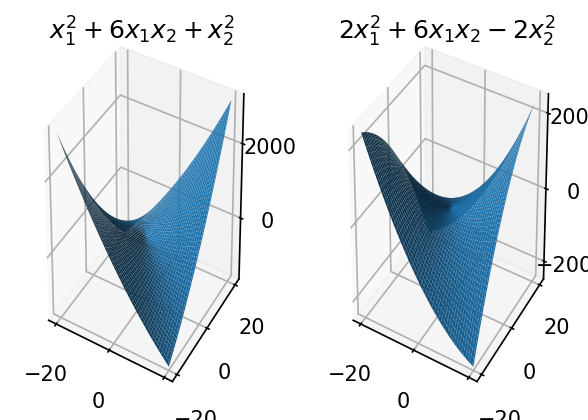

In [10]:

fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
ax[0].plot_surface(x_vals, y_vals, f_vals_1)
ax[0].set_title('$x_1^2 + 6x_1 x_2 + x_2^2$')

ax[1].plot_surface(x_vals, y_vals, f_vals_2)
ax[1].set_title('$2x_1^2 + 6x_1 x_2 - 2x_2^2$')

fig_dpi = 150
fig_width = 12.2/2.54
fig_height = 8.6/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))
plt.show()

According to the graphs, both f1 and f2 are indefinite, this can checked seeing the eigenvalves of the matrix Q for each function.

In [ ]:
Q1 = np.array([[1, 4], [2, 1]])

f1_eigvals, f1_eigvects = np.linalg.eig(Q1)

is_positive = np.allclose(f1_eigvals > 0, True)
is_negative = np.allclose(f1_eigvals < 0, True)

print('Is ', f1, ' positive?', is_positive)
print('Is ', f1, ' negative?', is_negative)

Is  x1**2 + 6*x1*x2 + x2**2  positive? False
Is  x1**2 + 6*x1*x2 + x2**2  negative? False


In [ ]:
Q2 = np.array([[2, 2], [4, -2]])

f2_eigvals, f2_eigvects = np.linalg.eig(Q1)

is_positive = np.allclose(f2_eigvals > 0, True)
is_negative = np.allclose(f2_eigvals < 0, True)

print('Is ', f2, ' positive?', is_positive)
print('Is ', f2, ' negative?', is_negative)

Is  2*x1**2 + 6*x1*x2 - 2*x2**2  positive? False
Is  2*x1**2 + 6*x1*x2 - 2*x2**2  negative? False


In [ ]:
Q3 = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]])
f3_eigvals, f3_eigvects = np.linalg.eig(Q3)

is_positive = np.allclose(f3_eigvals > 0, True)
is_negative = np.allclose(f3_eigvals < 0, True)

print('Is ', f3, ' positive?', is_positive)
print('Is ', f3, ' negative?', is_negative)

Is  x1**2  positive? False
Is  x1**2  negative? False


In [ ]:
Q4 = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
f4_eigvals, f4_eigvects = np.linalg.eig(Q4)

is_positive = np.allclose(f4_eigvals > 0, True)
is_negative = np.allclose(f4_eigvals < 0, True)

print('Is ', f4, ' positive?', is_positive)
print('Is ', f4, ' negative?', is_negative)

Is  x1**2 + 2*x1*x2 + 2*x1*x3 + 2*x2*x3 + x3**2  positive? False
Is  x1**2 + 2*x1*x2 + 2*x1*x3 + 2*x2*x3 + x3**2  negative? False


##Problem 9

Using MATLAB, plot the graph, level sets and gradient vectors of:

In [ ]:
# Functions definitions
step = 0.05
gradient_step = 1
x1, x2 = sp.symbols("x1 x2")
f = (4*x1**4 + 2*x1**3*x2 - 6*x1**2*x2**2 + x2**4)/(x1**4+x2**4+1)

# Functions evaluations
lam_f = sp.lambdify([x1, x2], f, modules=['numpy'])

x_vals = np.arange(-3, 3, step)
y_vals = np.arange(-3, 3, step)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

# Symbolic to real values
f_vals = lam_f(x_vals, y_vals)
gradient_x, gradient_y = np.gradient(f_vals, gradient_step)

In [ ]:
f

(4*x1**4 + 2*x1**3*x2 - 6*x1**2*x2**2 + x2**4)/(x1**4 + x2**4 + 1)

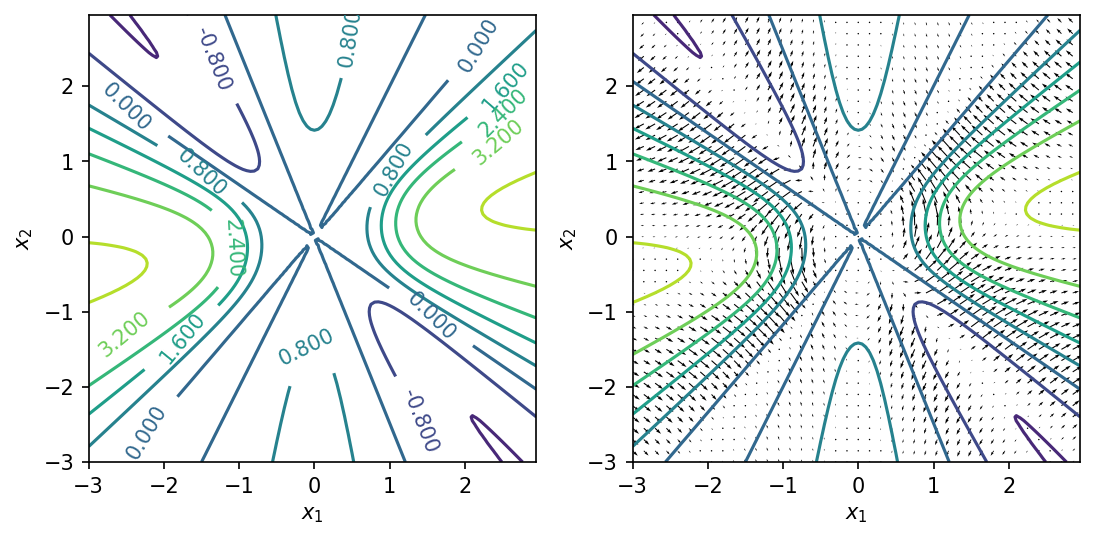

In [ ]:
fig, ax = plt.subplots(1,2)

contour = ax[0].contour (x_vals, y_vals, f_vals) 
ax[0].set_xlabel( '$x_1$' ) 
ax[0].set_ylabel( '$x_2$' )
ax[0].clabel(contour)

skip=(slice(None,None,3),slice(None,None,3))
ax[1].contour (x_vals, y_vals, f_vals)
ax[1].quiver(x_vals[skip], y_vals[skip], gradient_x[skip], gradient_y[skip],
 minshaft=1.5, minlength=1.5, scale_units='xy', scale=1.1)
ax[1].set_xlabel( '$x_1$' ) 
ax[1].set_ylabel( '$x_2$' )

fig_dpi = 150
fig_width = 18.8/2.54
fig_height = 9.4/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))
fig.tight_layout()

plt.show()

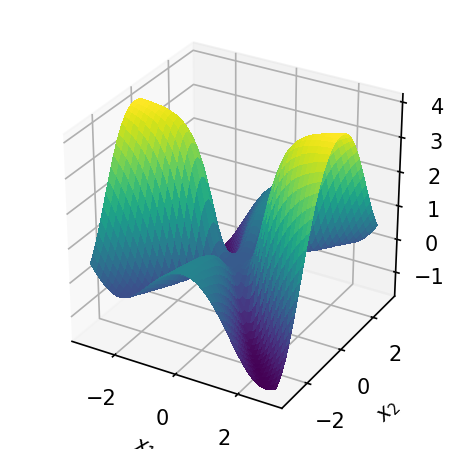

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x_vals, y_vals, f_vals, cmap=cm.viridis,
                       linewidth=0.1, antialiased=False)
ax.set_xlabel( '$x_1$' ) 
ax.set_ylabel( '$x_2$' )

fig_dpi = 150
fig_width = 9.4/2.54
fig_height = 9.4/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))

plt.show()